In [1]:
#importing packages
from random import randint
import tkinter as tk
import copy, webbrowser, os
from tkinter import *
from IPython.display import Image

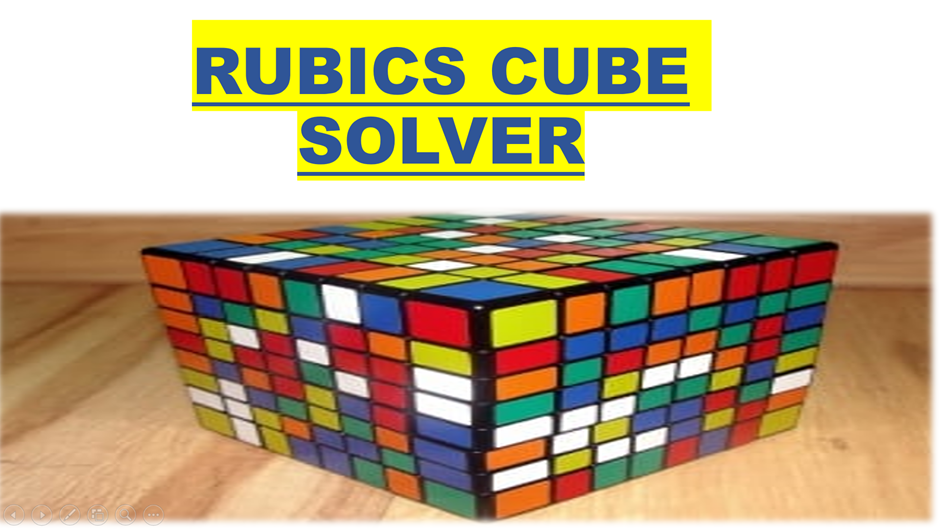
<h3><strong style="color:blue;font-size:40px;font-family:serif;"><br><br><br>Features</br></br></br></strong></h3>
<p style= "font-family:Georgia;color:#000000;font-size:110%;">
<h5><br>🏻 User or program generated scrambles</h5></br>
<h5><br>🏻 The ability to make custom moves</h5></br>
<h5><br>🏻 The ability to hit either the solve button, or each step of the solve to see it solve step-by-step</h5></br>
<h5><br>🏻 The ability to run simulations with a user defined amount of solves (be careful, too many could make the program freeze)</h5></br>
<h5><br>🏻 Ability to copy scrambles or solutions to the clipboard, as well as view externally.</h5></br>
<h5><br>🏻 Clicking on the 2D cube will allow you to see the other bottom tiles that are not normally visible.</h5></br>

<h3><strong style="color:blue;font-size:40px;font-family:serif;"><center>Various Commands</center></strong></h3>
If you don't want to use the GUI, you can also just type function commands in the interpreter. Here are some of the useful ones:
<h5><br>🏿 print_cube() Prints the cube in text format</h5></br>
<h5><br>🏿 scramble() You can either provide a number, a scramble in string format, or nothing for a 25 move default scramble</h5></br>
<h5><br>🏿 get_scramble() Prints the previous scramble</h5></br>
<h5><br>🏿 solve() Will solve the cube</h5></br>
<h5><br>🏿 get_moves() Prints out the Solution that was generated upon using solve()</h5></br>
<h5><br>🏿 simulation(num) The number provided is the amount of solves you want to simulate. Will return you the best solve with it's scramble, as well as the worst solve and it's scramble.</h5></br>

<h4><br>The Solver itself is based upon a CFOP (Fridrich) method of solving. It solves the Cross, does the F2L step, does a 2-look OLL, and a 2-look PLL. As for notation, basic notation used in the cubing world is used, however, a counterclockwise move can be denoted with either an apostrophe (standard way), or using the letter i (denoting i for inverse).</br></h4>

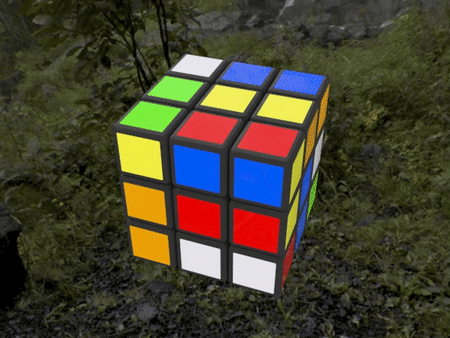

In [2]:
Image("https://thumbs.gfycat.com/SatisfiedRewardingAfricanfisheagle-size_restricted.gif")

In [ ]:
#globals
moves_list = []
last_scramble = []
f2l_list = []
step_moves_list = []
solution_length = 0

#creates a 3d list representing a solved cube
def make_cube():
    global step_moves_list, f2l_list, moves_list
    step_moves_list = [0,0,0,0]
    f2l_list = []
    moves_list = []
    return [   [['W', 'W', 'W'],
                ['W', 'W', 'W'],
                ['W', 'W', 'W']], #Up/white
               
               [['G', 'G', 'G'],
                ['G', 'G', 'G'],
                ['G', 'G', 'G']], #front/green
               
               [['R', 'R', 'R'],
                ['R', 'R', 'R'],
                ['R', 'R', 'R']], #right/red
               
               [['O', 'O', 'O'],
                ['O', 'O', 'O'],
                ['O', 'O', 'O']], #left/orange
               
               [['Y', 'Y', 'Y'],
                ['Y', 'Y', 'Y'],
                ['Y', 'Y', 'Y']], #down/yellow
               
               [['B', 'B', 'B'],
                ['B', 'B', 'B'],
                ['B', 'B', 'B']]] #back/blue

a = make_cube()

#prints a string representation of the cube to the interpreter
def print_cube():
    print('\t\t'+str(a[5][0])+'\n\t\t'+str(a[5][1])+'\n\t\t'+str(a[5][2]))   
    print(str(a[3][0])+' '+str(a[0][0])+' '+str(a[2][0]))
    print(str(a[3][1])+' '+str(a[0][1])+' '+str(a[2][1]))   
    print(str(a[3][2])+' '+str(a[0][2])+' '+str(a[2][2]))
    print('\t\t'+str(a[1][0])+'\n\t\t'+str(a[1][1])+'\n\t\t'+str(a[1][2]))
    print('\t\t'+str(a[4][0])+'\n\t\t'+str(a[4][1])+'\n\t\t'+str(a[4][2]))

#simplifies the list of moves and returns a string representation of the moves
def get_moves():
    simplify_moves()
    s = ""
    for i in moves_list:
        s += str(i) + " "
    s = str.replace(s, "i", "'")[:-1] 
    return s

#returns a string representation of the last scramble
def get_scramble():
    s = ""
    for i in last_scramble:
        s += str(i) + " "
    s = str.replace(s, "i", "'")[:-1] #apostrophe means in reverse direction usually clockwise the general notation but added
    # added with "'" means anticlockwise
    return s

#helper function: returns True if all elements in a set are equal
def all_same(items):
    return all(x == items[0] for x in items)

#Transforms a given move into the corresponding move after a Y-rotation\
#Right , Left , Up, Down ,Front , Back
def yTransform(move):
    if move[0] in ["U", "D"]:  
        return move
    if move[0] == "F":
        return "R" + move[1:]
    if move[0] == "R":
        return "B" + move[1:]
    if move[0] == "B":
        return "L" + move[1:]
    if move[0] == "L":
        return "F" + move[1:] 
    raise Exception("Invalid move to yTransform: " + move)

#modifies the global moves list by removing redundancies
def simplify_moves():
    global moves_list, solution_length
    new_list = []
    prev_move = ""
    yCount = 0
    for move in moves_list:
        if move == "Y":
            yCount += 1
            yCount %= 4 #because 4 sides to move
            continue
        if move == "Yi":
            yCount += 3
            yCount %= 4
            continue
        if move == "Y2":
            yCount += 2
            yCount %= 4
            continue
        if yCount > 0:
            for i in range(yCount):
                move = yTransform(move)
        if prev_move == "" or prev_move == '':
            prev_move = move
            new_list.append(move)
            continue
        if move[0] == prev_move[0]:
            if len(move) == 1:
                if len(prev_move) <= 1:
                    del new_list[-1]
                    mv = move[0] + "2"
                    new_list.append(mv)
                    prev_move = mv
                    continue
                if prev_move[1] == "i":
                    del new_list[-1]
                    prev_move = new_list[-1] if len(new_list) > 0 else ""
                    continue
                if prev_move[1] == "2":
                    del new_list[-1]
                    mv = move[0] + "i"
                    new_list.append(mv)
                    prev_move = mv
                    continue
            if move[1] == "i":
                if len(prev_move) == 1:
                    del new_list[-1]
                    prev_move = new_list[-1] if len(new_list) > 0 else ""
                    continue
                if prev_move[1] == "i":
                    del new_list[-1]
                    mv = move[0] + "2"
                    new_list.append(mv)
                    prev_move = mv
                    continue
                if prev_move[1] == "2":
                    del new_list[-1]
                    mv = move[0]
                    new_list.append(mv)
                    prev_move = mv
                    continue
            if move[1] == "2":
                if len(prev_move) == 1:
                    del new_list[-1]
                    mv = move[0] + "i"
                    new_list.append(mv)
                    prev_move = mv
                    continue
                if prev_move[1] == "i":
                    del new_list[-1]
                    mv = move[0]
                    new_list.append(mv)
                    prev_move = mv
                    continue
                if prev_move[1] == "2":
                    del new_list[-1]
                    prev_move = new_list[-1] if len(new_list) > 0 else ""
                    continue
        new_list.append(move)
        prev_move = move
    solution_length = len(new_list)
    moves_list = new_list

#sets up the cube to perform a move by rotating that face to the top
def setup(face):
    face = str.lower(face)
    if face == "f":
        move("X")
    elif face == "r":
        move("Zi")
    elif face == "l":
        move("Z")
    elif face == "d":
        move("X2")
    elif face == "b":
        move("Xi")
    else:
        raise Exception("Invalid setup; face: " + face)

#performs the inverse of setup to restore the cube's previous orientation
def undo(face):
    face = str.lower(face)
    if face == "f":
        move("Xi")
    elif face == "r":
        move("Z")
    elif face == "l":
        move("Zi")
    elif face == "d":
        move("X2")
    elif face == "b":
        move("X")
    else:
        raise Exception("Invalid undo; face: " + face)

#Tokenizes a string of moves 	 --> for user use directly inputting the moves and saving 
#it as a string for further implementation
def m(s):
    s = str.replace(s, "'", "i")
    k = s.split(' ')
    global moves_list, solution_length
    solution_length += len(k)
    for word in k:
        moves_list.append(word)
        move(word)
#performs a move by setting up, performing U moves, and undoing the setup
def move(mv):
    mv = str.lower(mv)
    if mv == "u":
        U()
    elif mv == "u2":
        move("U"); move("U");
    elif mv == "ui":
        move("U"); move("U"); move("U");
    elif mv == "f":
        setup("F"); U(); undo("F");
    elif mv == "f2":
        move("F"); move("F");
    elif mv == "fi":
        move("F"); move("F"); move("F");
    elif mv == "r":
        setup("R"); U(); undo("R");
    elif mv == "r2":
        move("R"); move("R");
    elif mv == "ri":
        move("R"); move("R"); move("R");
    elif mv == "l":
        setup("L"); U(); undo("L");
    elif mv == "l2":
        move("L"); move("L");
    elif mv == "li":
        move("L"); move("L"); move("L");
    elif mv == "b":
        setup("B"); U(); undo("B");
    elif mv == "b2":
        move("B"); move("B");
    elif mv == "bi":
        move("B"); move("B"); move("B");
    elif mv == "d":
        setup("D"); U(); undo("D");
    elif mv == "d2":
        move("D"); move("D");
    elif mv == "di":
        move("D"); move("D"); move("D");
    elif mv == "x":
        rotate("X")
    elif mv == "x2":
        move("X"); move("X");
    elif mv == "xi":
        move("X"); move("X"); move("X");
    elif mv == "y":
        rotate("Y")
    elif mv == "y2":
        move("Y"); move("Y");
    elif mv == "yi":
        move("Y"); move("Y"); move("Y");
    elif mv == "z":
        rotate("Z")
    elif mv == "z2":
        move("Z"); move("Z");
    elif mv == "zi":
        move("Z"); move("Z"); move("Z");
    elif mv == "uw":
        move("D"); move("Y");
    elif mv == "uw2":
        move("UW"); move("UW");
    elif mv == "uwi":
        move("UW"); move("UW"); move("UW");
    elif mv == "m":
        move("Li"); move("R"); move("Xi");
    elif mv == "mi":
        move("M"); move("M"); move("M");
    elif mv == "m2":
        move("M"); move("M");
    elif mv == "rw":
        move("L"); move("X");
    elif mv == "rwi":
        move("RW"); move("RW"); move("RW");
    elif mv == "rw2":
        move("RW"); move("RW");
    elif mv == "fw":
        move("Bi"); move("Z");
    elif mv == "fwi":
        move("FW"); move("FW"); move("FW");
    elif mv == "fw2":
        move("FW"); move("FW");
    elif mv == "lw":
        move("R"); move("Xi");
    elif mv == "lwi":
        move("LW"); move("LW"); move("LW");
    elif mv == "lw2":
        move("LW"); move("LW");
    elif mv == "bw":
        move("F"); move("Zi");
    elif mv == "bwi":
        move("BW"); move("BW"); move("BW");
    elif mv == "bw2":
        move("BW"); move("BW");
    elif mv == "dw":
        move("U"); move("Yi");
    elif mv == "dwi":
        move("DW"); move("DW"); move("DW");
    elif mv == "dw2":
        move("DW"); move("DW");
    else:
        raise Exception("Invalid Move: " + str(mv))

#rotates the entire cube along a particular axis
def rotate(axis):
    axis = str.lower(axis)
    if axis == 'x': #R
        temp = a[0]
        a[0] = a[1]
        a[1] = a[4]
        a[4] = a[5]
        a[5] = temp
        rotate_face_counterclockwise("L")
        rotate_face_clockwise("R")
    elif axis == 'y': #U
        temp = a[1]
        a[1] = a[2]
        a[2] = a[5]
        a[5] = a[3]
        a[3] = temp
        #after swaps,
        rotate_face_clockwise("L")
        rotate_face_clockwise("F")
        rotate_face_clockwise("R")
        rotate_face_clockwise("B")
        rotate_face_clockwise("U")
        rotate_face_counterclockwise("D")
    elif axis == 'z': #F
        temp = a[0]
        a[0] = a[3]
        a[3] = a[4]
        a[4] = a[2]
        a[2] = temp
        rotate_face_clockwise("L"); rotate_face_clockwise("L");
        rotate_face_clockwise("D"); rotate_face_clockwise("D");
        rotate_face_clockwise("F")
        rotate_face_counterclockwise("B")
    else:
        raise Exception("Invalid rotation: " + axis)

#performs a U move
def U():
    #rotate U face
    temp = a[0][0][0]
    a[0][0][0] = a[0][2][0]
    a[0][2][0] = a[0][2][2]
    a[0][2][2] = a[0][0][2]
    a[0][0][2] = temp
    temp = a[0][0][1]
    a[0][0][1] = a[0][1][0]
    a[0][1][0] = a[0][2][1]
    a[0][2][1] = a[0][1][2]
    a[0][1][2] = temp

    #rotate others
    temp = a[5][2][0]
    a[5][2][0] = a[3][2][2]
    a[3][2][2] = a[1][0][2]
    a[1][0][2] = a[2][0][0]
    a[2][0][0] = temp
    temp = a[5][2][1]
    a[5][2][1] = a[3][1][2]
    a[3][1][2] = a[1][0][1]
    a[1][0][1] = a[2][1][0]
    a[2][1][0] = temp
    temp = a[5][2][2]
    a[5][2][2] = a[3][0][2]
    a[3][0][2] = a[1][0][0]
    a[1][0][0] = a[2][2][0]
    a[2][2][0] = temp

#Rotates a particular face counter-clockwise
def rotate_face_counterclockwise(face):
    rotate_face_clockwise(face)
    rotate_face_clockwise(face)
    rotate_face_clockwise(face)

#Rotates a particular face clockwise
def rotate_face_clockwise(face):
    f_id = -1
    face = str.lower(face)
    if face == "u":
        f_id = 0
    elif face == "f":
        f_id = 1
    elif face == "r":
        f_id = 2
    elif face == "l":
        f_id = 3
    elif face == "d":
        f_id = 4
    elif face == "b":
        f_id = 5
    else:
        raise Exception("Invalid face: " + face)
    temp = a[f_id][0][0]
    a[f_id][0][0] = a[f_id][2][0]
    a[f_id][2][0] = a[f_id][2][2]
    a[f_id][2][2] = a[f_id][0][2]
    a[f_id][0][2] = temp
    temp = a[f_id][0][1]
    a[f_id][0][1] = a[f_id][1][0]
    a[f_id][1][0] = a[f_id][2][1]
    a[f_id][2][1] = a[f_id][1][2]
    a[f_id][1][2] = temp

#Randomly scrambles the cube given a number of moves, or given a list of moves
def scramble(moves=25):
    global last_scramble, moves_list, solution_length, a
    a = make_cube()
    if hasattr(moves, '__iter__'): #scramble given a list of moves
        m(moves)
        moves_list = []
        solution_length = 0
        temp = moves.split(' ')
        last_scramble = temp
    else: #scramble randomly a certain number of times
        moves_list = [] #reset moves_list
        last_scramble = [] #reset last scramble
        prevMove = ""
        for i in range(moves):
            while True:
                thisMove = ""
                r = randint(0, 5)
                if r == 0:
                    thisMove += "U"
                elif r == 1:
                    thisMove += "F"
                elif r == 2:
                    thisMove += "R"
                elif r == 3:
                    thisMove += "L"
                elif r == 4:
                    thisMove += "D"
                elif r == 5:
                    thisMove += "B"
                if thisMove == "U" and prevMove != "U" and prevMove != "D":
                    break
                if thisMove == "F" and prevMove != "F" and prevMove != "B":
                    break
                if thisMove == "R" and prevMove != "R" and prevMove != "L":
                    break
                if thisMove == "L" and prevMove != "L" and prevMove != "R":
                    break
                if thisMove == "D" and prevMove != "D" and prevMove != "U":
                    break
                if thisMove == "B" and prevMove != "B" and prevMove != "F":
                    break
            r = randint(0, 3)
            if r == 1:
                move(thisMove + "i")
                last_scramble.append(thisMove + "i")
            elif r == 2:
                move(thisMove + "2")
                last_scramble.append(thisMove + "2")
            else:
                move(thisMove)
                last_scramble.append(thisMove)
            prevMove = thisMove
    
#Solves the top cross as part of the OLL step
def topCross():
    # if all the edges are all equal to eachother (all being white)
    if a[0][0][1] == a[0][1][0] == a[0][1][2] == a[0][2][1]:
        #print("Cross already done, step skipped")
        return
	#If this is true, we have our cross and we can go onto the next step
    else:
        while a[0][0][1] != "W" or a[0][1][0] != "W" or a[0][1][2] != "W" or a[0][2][1] != "W":
            if a[0][1][0] == a[0][1][2]:
                    #if we have a horizontal line Just do alg
                    m("F R U Ri Ui Fi")
                    break #breaking w/o having to recheck while conditions again, this will give us a cross
            elif a[0][0][1] == a[0][2][1]:
                    # if we have a vertical line, do a U then alg
                    m("U F R U Ri Ui Fi")
                    break
            elif a[0][0][1] != "W" and a[0][1][0] != "W" and a[0][1][2] != "W" and a[0][2][1] != "W":
                    #This would mean we have a dot case, so perform
                    m("F U R Ui Ri Fi U F R U Ri Ui Fi")
                    break
            elif a[0][1][2] == a[0][2][1] or a[0][0][1] == a[0][1][0]:
                    # If we have an L case in the top left or the bottom right, will give us a line
                    m("F R U Ri Ui Fi")
            else:
                    #This is we dont have a line, dot, cross, or L in top left or bottom right
                    m("U")
                    
#returns True if the top is solved
def isTopSolved():
    #determines if the top of the cube is solved.
    if a[0][0][0] == a[0][0][1] == a[0][0][2] == a[0][1][0] == a[0][1][1] == a[0][1][2] == a[0][2][0] == a[0][2][1] == a[0][2][2]:
        return True
    else:
        return False			

#puts a single edge piece in the proper location for the cross
#Assumes the cross is formed on the bottom and is the yellow face
#Checks all edges in front/up face, then back-right/left if needed
def putCrossEdge():
    global moves_list
    for i in range(3):
        if i == 1:
            m("Ri U R F2")  #bring out back-right edge
        elif i == 2:
            m("L Ui Li F2") #bring out back-left edge
        for j in range(4):
            for k in range(4):
                if "Y" in [a[4][0][1], a[1][2][1]]:
                    return
                m("F")
            m("U")

#Performs the first step of the solution: the cross
def cross():
    for i in range(4):
        putCrossEdge()
        assert "Y" in [a[4][0][1], a[1][2][1]]
        if a[1][2][1] == "Y":
            m("Fi R U Ri F2")   #orient if necessary
        m("Di")

    #permute to correct face: move down face until 2 are lined up,
    #then swap the other 2 if they need to be swapped
    condition = False
    while not condition:
        fSame = a[1][1][1] == a[1][2][1]
        rSame = a[2][1][1] == a[2][1][2]
        bSame = a[5][1][1] == a[5][0][1]
        lSame = a[3][1][1] == a[3][1][0]
        condition = (fSame, rSame, bSame, lSame).count(True) >= 2
        if not condition:
            m("D")
    if (fSame, rSame, bSame, lSame).count(True) == 4:
        return
    assert (fSame, rSame, bSame, lSame).count(True) == 2
    if not fSame and not bSame:
        m("F2 U2 B2 U2 F2") #swap front-back
    elif not rSame and not lSame:
        m("R2 U2 L2 U2 R2") #swap right-left
    elif not fSame and not rSame:
        m("F2 Ui R2 U F2") #swap front-right
    elif not rSame and not bSame:
        m("R2 Ui B2 U R2") #swap right-back
    elif not bSame and not lSame:
        m("B2 Ui L2 U B2") #swap back-left
    elif not lSame and not fSame:
        m("L2 Ui F2 U L2") #swap left-front
    fSame = a[1][1][1] == a[1][2][1]
    rSame = a[2][1][1] == a[2][1][2]
    bSame = a[5][1][1] == a[5][0][1]
    lSame = a[3][1][1] == a[3][1][0]
    assert all([fSame, rSame, bSame, lSame])

#This is uses all the f2l algs to solve all the cases possible
def solveFrontSlot():
    #This will be F2L, with all 42 cases
    rmid = a[2][1][1]
    fmid = a[1][1][1]
    dmid = a[4][1][1]
    #corner orientations if in U layer, first letter means the direction that the color is facing
    fCorU = a[1][0][2] == dmid and a[0][2][2] == fmid and a[2][2][0] == rmid
    rCorU = a[2][2][0] == dmid and a[1][0][2] == fmid and a[0][2][2] == rmid
    uCorU = a[0][2][2] == dmid and a[2][2][0] == fmid and a[1][0][2] == rmid
    #Corner orientations for correct location in D layer
    fCorD = a[1][2][2] == dmid and a[2][2][2] == fmid and a[4][0][2] == rmid
    rCorD = a[2][2][2] == dmid and a[4][0][2] == fmid and a[1][2][2] == rmid
    dCorD = a[4][0][2] == dmid and a[1][2][2] == fmid and a[2][2][2] == rmid #This is solved spot
    #edge orientations on U layer, normal or flipped version based on F face
    norEdgeFU = a[1][0][1] == fmid and a[0][2][1] == rmid
    norEdgeLU = a[3][1][2] == fmid and a[0][1][0] == rmid
    norEdgeBU = a[5][2][1] == fmid and a[0][0][1] == rmid
    norEdgeRU = a[2][1][0] == fmid and a[0][1][2] == rmid
    norEdgeAny = norEdgeFU or norEdgeLU or norEdgeBU or norEdgeRU
    flipEdgeFU = a[0][2][1] == fmid and a[1][0][1] == rmid
    flipEdgeLU = a[0][1][0] == fmid and a[3][1][2] == rmid
    flipEdgeBU = a[0][0][1] == fmid and a[5][2][1] == rmid
    flipEdgeRU = a[0][1][2] == fmid and a[2][1][0] == rmid
    flipEdgeAny = flipEdgeFU or flipEdgeLU or flipEdgeBU or flipEdgeRU
    #edge orientations for normal or flipped insertion into slot
    norEdgeInsert = a[1][1][2] == fmid and a[2][2][1] == rmid #This is solved spot
    flipEdgeInsert = a[2][2][1] == fmid and a[1][1][2] == rmid
    #these are for if the back right or front left slots are open or not
    backRight = a[4][2][2] == dmid and a[5][1][2] == a[5][0][2] == a[5][1][1] and a[2][0][1] == a[2][0][2] == rmid
    frontLeft = a[4][0][0] == dmid and a[1][1][0] == a[1][2][0] == fmid and a[3][2][0] == a[3][2][1] == a[3][1][1]
    
    if dCorD and norEdgeInsert: 
        return
    #Easy Cases
    elif fCorU and flipEdgeRU: #Case 1
        m("U R Ui Ri")
    elif rCorU and norEdgeFU: #Case 2
        m("F Ri Fi R")
    elif fCorU and norEdgeLU: #Case 3
        m("Fi Ui F")
    elif rCorU and flipEdgeBU: #Case 4
        m("R U Ri")
    #Reposition Edge
    elif fCorU and flipEdgeBU: #Case 5
        m("F2 Li Ui L U F2")
    elif rCorU and norEdgeLU: #Case 6
        m("R2 B U Bi Ui R2")
    elif fCorU and flipEdgeLU: #Case 7
        m("Ui R U2 Ri U2 R Ui Ri")
    elif rCorU and norEdgeBU: #Case 8
        m("U Fi U2 F Ui F Ri Fi R")
    # Reposition edge and Corner Flip
    elif fCorU and norEdgeBU: #Case 9
        m("Ui R Ui Ri U Fi Ui F")
    elif rCorU and flipEdgeLU: #Case 10
        if not backRight:
            m("Ri U R2 U Ri")
        else:
            m("Ui R U Ri U R U Ri")
    elif fCorU and norEdgeRU: #Case 11
        m("Ui R U2 Ri U Fi Ui F")
    elif rCorU and flipEdgeFU: # Case 12
        if not backRight:
            m("Ri U2 R2 U Ri")
        else:
            m("Ri U2 R2 U R2 U R")
    elif fCorU and norEdgeFU: #Case 13
        if not backRight:
            m("Ri U R Fi Ui F")
        else:
            m("U Fi U F Ui Fi Ui F")
    elif rCorU and flipEdgeRU: #Case 14
        m("Ui R Ui Ri U R U Ri")
    # Split Pair by Going Over
    elif fCorU and flipEdgeFU: #Case 15
        if not backRight:
            m("Ui Ri U R Ui R U Ri")
        elif not frontLeft:
            m("U R Ui Ri D R Ui Ri Di")
        else:
            m("U Ri F R Fi U R U Ri")
    elif rCorU and norEdgeRU: # Case 16
        m("R Ui Ri U2 Fi Ui F")
    elif uCorU and flipEdgeRU: #Case 17
        m("R U2 Ri Ui R U Ri")
    elif uCorU and norEdgeFU: # Case 18
        m("Fi U2 F U Fi Ui F")
    # Pair made on side
    elif uCorU and flipEdgeBU: #Case 19
        m("U R U2 R2 F R Fi")
    elif uCorU and norEdgeLU: #Case 20
        m("Ui Fi U2 F2 Ri Fi R")
    elif uCorU and flipEdgeLU: #Case 21
        m("R B U2 Bi Ri")
    elif uCorU and norEdgeBU: #Case 22
        m("Fi Li U2 L F")
    #Weird Cases
    elif uCorU and flipEdgeFU: #Case 23
        m("U2 R2 U2 Ri Ui R Ui R2")
    elif uCorU and norEdgeRU: #Case 24
        m("U Fi Li U L F R U Ri")
    #Corner in Place, edge in the U face (All these cases also have set-up moves in case the edge is in the wrong orientation
    elif dCorD and flipEdgeAny: #Case 25
        if flipEdgeBU:
            m("U") #set-up move
        elif flipEdgeLU:
            m("U2") #set-up move
        elif flipEdgeFU:
            m("Ui") #set-up move
        if not backRight:
            m("R2 Ui Ri U R2")
        else:
            m("Ri Fi R U R Ui Ri F")
    elif dCorD and norEdgeAny: #Case 26
        if norEdgeRU:
            m("U") #set-up move
        elif norEdgeBU:
            m("U2") #set-up move
        elif norEdgeLU:
            m("Ui") #set-up move
        m("U R Ui Ri F Ri Fi R")
    elif fCorD and flipEdgeAny: #Case 27
        if flipEdgeBU:
            m("U") #set-up move
        elif flipEdgeLU:
            m("U2") #set-up move
        elif flipEdgeFU:
            m("Ui") #set-up move
        m("R Ui Ri U R Ui Ri")
    elif rCorD and norEdgeAny: #Case 28
        if norEdgeRU:
            m("U") #set-up move
        elif norEdgeBU:
            m("U2") #set-up move
        elif norEdgeLU:
            m("Ui") #set-up move
        m("R U Ri Ui F Ri Fi R")
    elif fCorD and norEdgeAny: #Case 29
        if norEdgeRU:
            m("U") #set-up move
        elif norEdgeBU:
            m("U2") #set-up move
        elif norEdgeLU:
            m("Ui") #set-up move
        m("U2 R Ui Ri Fi Ui F")
    elif rCorD and flipEdgeAny: #Case 30
        if flipEdgeBU:
            m("U") #set-up move
        elif flipEdgeLU:
            m("U2") #set-up move
        elif flipEdgeFU:
            m("Ui") #set-up move
        m("R U Ri Ui R U Ri")
    #Edge in place, corner in U Face
    elif uCorU and flipEdgeInsert: # Case 31
        m("R U2 Ri Ui F Ri Fi R")
    elif uCorU and norEdgeInsert: # Case 32
        m("R2 U R2 U R2 U2 R2")
    elif fCorU and norEdgeInsert: # Case 33
        m("Ui R Ui Ri U2 R Ui Ri")
    elif rCorU and norEdgeInsert: # Case 34
        m("Ui R U2 Ri U R U Ri")
    elif fCorU and flipEdgeInsert: # Case 35
        m("U2 R Ui Ri Ui Fi Ui F")
    elif rCorU and flipEdgeInsert: # Case 36
        m("U Fi Ui F Ui R U Ri")
    #Edge and Corner in place
    #Case 37 is Lol case, already completed
    elif dCorD and flipEdgeInsert: #Case 38 (Typical flipped f2l pair case
        m("R2 U2 F R2 Fi U2 Ri U Ri")
    elif fCorD and norEdgeInsert: # Case 39
        m("R2 U2 Ri Ui R Ui Ri U2 Ri")
    elif rCorD and norEdgeInsert: # Case 40
        m("R U2 R U Ri U R U2 R2")
    elif fCorD and flipEdgeInsert: #Case 41
        m("F2 Li Ui L U F Ui F")
    elif rCorD and flipEdgeInsert: # Case 42
        m("R Ui Ri Fi Li U2 L F")

#Returns true if the f2l Corner in FR spot is inserted and oriented correctly
def f2lCorner():
    return a[4][0][2] == a[4][1][1] and a[1][2][2] == a[1][1][1] and a[2][2][2] == a[2][1][1] #This is solved spot

#Returns true if the f2l edge in FR spot is inserted and oriented correctly    
def f2lEdge():
    return a[1][1][2] == a[1][1][1] and a[2][2][1] == a[2][1][1] #This is solved spot

#Returns true if the f2l edge and corner are properly inserted and orientated in the FR position
def f2lCorrect():
    return f2lCorner() and f2lEdge()

# returns if the f2l edge is on the top layer at all
def f2lEdgeOnTop():
    rmid = a[2][1][1]
    fmid = a[1][1][1]
    dmid = a[4][1][1]
    #edge orientations on U layer, normal or flipped version based on F face
    norEdgeFU = a[1][0][1] == fmid and a[0][2][1] == rmid
    norEdgeLU = a[3][1][2] == fmid and a[0][1][0] == rmid
    norEdgeBU = a[5][2][1] == fmid and a[0][0][1] == rmid
    norEdgeRU = a[2][1][0] == fmid and a[0][1][2] == rmid
    norEdgeAny = norEdgeFU or norEdgeLU or norEdgeBU or norEdgeRU
    flipEdgeFU = a[0][2][1] == fmid and a[1][0][1] == rmid
    flipEdgeLU = a[0][1][0] == fmid and a[3][1][2] == rmid
    flipEdgeBU = a[0][0][1] == fmid and a[5][2][1] == rmid
    flipEdgeRU = a[0][1][2] == fmid and a[2][1][0] == rmid
    flipEdgeAny = flipEdgeFU or flipEdgeLU or flipEdgeBU or flipEdgeRU
    return norEdgeAny or flipEdgeAny

#returns true if the f2l edge is inserted. Can be properly orientated, or flipped.
def f2lEdgeInserted():
    rmid = a[2][1][1]
    fmid = a[1][1][1]
    #edge orientations for normal or flipped insertion into slot
    norEdgeInsert = a[1][1][2] == fmid and a[2][2][1] == rmid #This is solved spot
    flipEdgeInsert = a[2][2][1] == fmid and a[1][1][2] == rmid
    return norEdgeInsert or flipEdgeInsert

#This is used to determine if the front f2l edge is inserted or not, the parameter is for the requested edge. takes BR, BL, and FL as valid
def f2lEdgeInserted2(p):
    rmid = a[2][1][1]
    fmid = a[1][1][1]
    #edge orientations for normal or flipped insertion into slot
    norEdgeInsert = a[1][1][2] == fmid and a[2][2][1] == rmid #This is solved spot
    flipEdgeInsert = a[2][2][1] == fmid and a[1][1][2] == rmid
    #Edge orientations in comparison to Front and Right colors
    BR = (a[5][1][2] == fmid and a[2][0][1] == rmid) or (a[5][1][2] == rmid and a[2][0][1] == fmid)
    BL = (a[3][0][1] == fmid and a[5][1][0] == rmid) or (a[3][0][1] == rmid and a[5][1][0] == fmid)
    FL = (a[3][2][1] == fmid and a[1][1][0] == rmid) or (a[3][2][1] == rmid and a[1][1][0] == fmid)
    
    if p == "BR":
        if BR:
            return True
        else:
            return False
    elif p == "BL":
        if BL:
            return True
        return False
    elif p == "FL":
        if FL:
            return True
        return False
    elif p == "FR":
        if norEdgeInsert or flipEdgeInsert:
            return True
    return False
            

#returns true if f2l corner is inserted, doesn't have to be orientated correctly
def f2lCornerInserted():
    rmid = a[2][1][1]
    fmid = a[1][1][1]
    dmid = a[4][1][1]
    #Corner orientations for correct location in D layer
    fCorD = a[1][2][2] == dmid and a[2][2][2] == fmid and a[4][0][2] == rmid
    rCorD = a[2][2][2] == dmid and a[4][0][2] == fmid and a[1][2][2] == rmid
    dCorD = a[4][0][2] == dmid and a[1][2][2] == fmid and a[2][2][2] == rmid #This is solved spot
    return fCorD or rCorD or dCorD

#Returns true if there is an f2l corner located in the FR orientation
def f2lFRCor():
    rmid = a[2][1][1]
    fmid = a[1][1][1]
    dmid = a[4][1][1]
    #corner orientations if in U layer, first letter means the direction that the color is facing
    fCorU = a[1][0][2] == dmid and a[0][2][2] == fmid and a[2][2][0] == rmid
    rCorU = a[2][2][0] == dmid and a[1][0][2] == fmid and a[0][2][2] == rmid
    uCorU = a[0][2][2] == dmid and a[2][2][0] == fmid and a[1][0][2] == rmid
    return fCorU or rCorU or uCorU

#Returns true if there is an f2l Edge located in the FU position
def f2lFUEdge():
    rmid = a[2][1][1]
    fmid = a[1][1][1]
    norEdgeFU = a[1][0][1] == fmid and a[0][2][1] == rmid
    flipEdgeFU = a[0][2][1] == fmid and a[1][0][1] == rmid
    return norEdgeFU or flipEdgeFU

#returns true if f2l corner is located on the U layer
def f2lCornerOnTop():
    wasFound = False
    for i in range(4): #Does 4 U moves to find the corner
        if f2lFRCor():
            wasFound = True
        m("U")
    return wasFound

#Will return the loction of the corner that belongs in the FR spot. Either returns BR, BL, FL, or FR.
def f2lCornerCheck():
    r = "FR"
    count = 0
    while count < 4:
        if count == 0:
            if f2lCornerInserted():
                r = "FR"
        elif count == 1:
            if f2lCornerInserted():
                r = "FL"
        elif count == 2:
            if f2lCornerInserted():
                r = "BL"
        elif count == 3:
            if f2lCornerInserted():
                r = "BR"
        m("D")
        count += 1
    return r

#Will return the loction of the edge that belongs in the FR spot.
#Either returns BR, BL, FL, or FR.
def f2lEdgeCheck():
    if f2lEdgeInserted2("FL"):
        return "FL"
    elif f2lEdgeInserted2("BL"):
        return "BL"
    elif f2lEdgeInserted2("BR"):
        return "BR"
    elif f2lEdgeInserted2("FR"):
        return "FR"
    else:
        raise Exception("f2lEdgeCheck() Exception")
    
#This is for the case where the Edge is inserted, but the corner is not
def f2lEdgeNoCorner():
    topEdgeTop = a[0][2][1]
    topEdgeFront = a[1][0][1]
    rmid = a[2][1][1]
    bmid = a[5][1][1]
    lmid = a[3][1][1]
    fmid = a[1][1][1]
    #This is for comparing the front edge to other various edges for advanced algs/lookahead
    BREdge = (topEdgeTop == rmid or topEdgeTop == bmid) and (topEdgeFront == rmid or topEdgeFront == bmid)
    BLEdge = (topEdgeTop == lmid or topEdgeTop == bmid) and (topEdgeFront == lmid or topEdgeFront == bmid)
    FLEdge = (topEdgeTop == fmid or topEdgeTop == lmid) and (topEdgeFront == fmid or topEdgeFront == lmid)
    if f2lCornerOnTop():
        while True:
            solveFrontSlot()
            if f2lCorrect():
                break
            m("U")
    else:
        if f2lCornerCheck() == "BR":
            if BREdge:
                m("Ri Ui R U2")
            else:
                m("Ri U R U")
        elif f2lCornerCheck() == "BL":
            if BLEdge:
                m("L U Li U")
            else:
                m("L Ui Li U2")
        elif f2lCornerCheck() == "FL":
            if FLEdge:
                m("Li U L Ui")
            else:
                m("Li Ui L")
    solveFrontSlot()

    if not f2lCorrect():
        raise Exception("Exception found in f2lEdgeNoCorner()")
    
    
#This is the case for if the corner is inserted, but the edge is not
def f2lCornerNoEdge():
    topEdgeTop = a[0][2][1]
    topEdgeFront = a[1][0][1]
    rmid = a[2][1][1]
    bmid = a[5][1][1]
    lmid = a[3][1][1]
    fmid = a[1][1][1]
    #This is for comparing the front edge to other various edges for advanced algs/lookahead
    BREdge = (topEdgeTop == rmid or topEdgeTop == bmid) and (topEdgeFront == rmid or topEdgeFront == bmid)
    BLEdge = (topEdgeTop == lmid or topEdgeTop == bmid) and (topEdgeFront == lmid or topEdgeFront == bmid)
    FLEdge = (topEdgeTop == fmid or topEdgeTop == lmid) and (topEdgeFront == fmid or topEdgeFront == lmid)
    if f2lEdgeOnTop():
        while True:
            solveFrontSlot()
            if f2lCorrect():
                break
            m("U")
    else:
        if f2lEdgeCheck() == "BR":
            if BREdge:
                m("Ri Ui R U2")
            else:
                m("Ri U R U")
        elif f2lEdgeCheck() == "BL":
            if BLEdge:
                m("L U Li U")
            else:
                m("L Ui Li U2")
        elif f2lEdgeCheck() == "FL":
            if FLEdge:
                m("Li U L Ui")
            else:
                m("Li Ui L")
    solveFrontSlot()

    if not f2lCorrect():
        raise Exception("Exception found in f2lCornerNoEdge()")

#this is the case for if the corner is on top, and the edge is not. Neither are inserted properly. Edge must be in another slot.
def f2lCornerTopNoEdge():
    topEdgeTop = a[0][2][1]
    topEdgeFront = a[1][0][1]
    rmid = a[2][1][1]
    bmid = a[5][1][1]
    lmid = a[3][1][1]
    fmid = a[1][1][1]
    #This is for comparing the front edge to other various edges for advanced algs/lookahead
    BREdge = (topEdgeTop == rmid or topEdgeTop == bmid) and (topEdgeFront == rmid or topEdgeFront == bmid)
    BLEdge = (topEdgeTop == lmid or topEdgeTop == bmid) and (topEdgeFront == lmid or topEdgeFront == bmid)
    FLEdge = (topEdgeTop == fmid or topEdgeTop == lmid) and (topEdgeFront == fmid or topEdgeFront == lmid)

    #Turn the top until the corner on the U face is in the proper position
    while True:
        if f2lFRCor():
            break
        m("U")
    #We will be checking additional edges to choose a more fitting alg for the sake of looking ahead
    if f2lEdgeCheck() == "BR":
        if BREdge:
            m("Ri Ui R")
        else:
            m("Ri U R")
    elif f2lEdgeCheck() == "BL":
        if BLEdge:
            m("U2 L Ui Li")
        else:
            m("L Ui Li U")
    elif f2lEdgeCheck() == "FL":
        if FLEdge:
            m("U2 Li Ui L U2")
        else:
            m("Li Ui L U")
    solveFrontSlot()

    if not f2lCorrect():
        raise Exception("Exception found in f2lCornerTopNoEdge()")

#This is the case for if the edge is on top, and the corner is not. Neither are inserted properly. Corner must be in another slot.
#The lookahead for this step is comparing the back edge to the slots, rather than the front one like other cases have
def f2lEdgeTopNoCorner():
    BackEdgeTop = a[0][0][1]
    BackEdgeBack = a[5][2][1]
    rmid = a[2][1][1]
    bmid = a[5][1][1]
    lmid = a[3][1][1]
    fmid = a[1][1][1]
    rs1 = BackEdgeTop == rmid or BackEdgeTop == bmid
    rs2 = BackEdgeBack == rmid or BackEdgeBack == bmid
    #This is for comparing the back edge to other various edges for advanced algs/lookahead
    BREdge = rs1 and rs2
    BLEdge = (BackEdgeTop == lmid or BackEdgeTop == bmid) and (BackEdgeBack == lmid or BackEdgeBack == bmid)
    FLEdge = (BackEdgeTop == fmid or BackEdgeTop == lmid) and (BackEdgeBack == fmid or BackEdgeBack == lmid)

    #Turn the top until the corner on the U face is in the proper position
    while True:
        if f2lFUEdge():
            break
        m("U")
    #We will be checking additional edges to choose a more fitting alg for the sake of looking ahead
    if f2lCornerCheck() == "BR":
        if BREdge:
            m("Ri U R U")
        else:
            m("Ui Ri U R U")
    elif f2lCornerCheck() == "BL":
        if BLEdge:
            m("L Ui Li U2")
        else:
            m("U2 L U2 Li")
    elif f2lCornerCheck() == "FL":
        if FLEdge:
            m("Li Ui L")
        else:
            m("U Li Ui L")
    solveFrontSlot()

    if not f2lCorrect():
        raise Exception("Exception found in f2lEdgeTopNoCorner()")
    

#This is the case for if the edge or corner are not on top, and not inserted properly. They must both be in other slots.
def f2lNoEdgeOrCorner():
    #The strategy here is to first find the corner and get it out. I will place it in the FR position where it belongs
    #I will then check if I have a case, and if we are all solved.
    #If I don't have it solved at this point, I will have to follow what happens in f2lCornerTopNoEdge()

    BackEdgeTop = a[0][0][1]
    BackEdgeBack = a[5][2][1]
    rmid = a[2][1][1]
    bmid = a[5][1][1]
    lmid = a[3][1][1]
    fmid = a[1][1][1]
    #This is for comparing the back edge to other various edges for advanced algs/lookahead
    BREdge = (BackEdgeTop == rmid or BackEdgeTop == bmid) and (BackEdgeBack == rmid or BackEdgeBack == bmid)
    BLEdge = (BackEdgeTop == lmid or BackEdgeTop == bmid) and (BackEdgeBack == lmid or BackEdgeBack == bmid)
    FLEdge = (BackEdgeTop == fmid or BackEdgeTop == lmid) and (BackEdgeBack == fmid or BackEdgeBack == lmid)
    
    #We will be checking additional edges to choose a more fitting alg for the sake of looking ahead
    if f2lCornerCheck() == "BR":
        if BREdge:
            m("Ri U R U")
        else:
            m("Ui Ri U R U")
    elif f2lCornerCheck() == "BL":
        if BLEdge:
            m("L Ui Li U2")
        else:
            m("U2 L U2 Li")
    elif f2lCornerCheck() == "FL":
        if FLEdge:
            m("Li Ui L")
        else:
            m("U Li Ui L")
    solveFrontSlot()

    if f2lCorrect():
        return
    else:
        f2lCornerTopNoEdge()

    if not f2lCorrect():
        raise Exception("Exception found in f2lNoEdgeOrCorner()")

#Will return true if the f2l is completed
def isf2lDone():
    rside = a[2][0][1] == a[2][0][2] == a[2][1][1] == a[2][1][2] == a[2][2][1] == a[2][2][2]
    bside = a[5][0][0] == a[5][0][1] == a[5][0][2] == a[5][1][0] == a[5][1][1] == a[5][1][2]
    lside = a[3][0][0] == a[3][0][1] == a[3][1][0] == a[3][1][1] == a[3][2][0] == a[3][2][1]
    fside = a[1][1][0] == a[1][1][1] == a[1][1][2] == a[1][2][0] == a[1][2][1] == a[1][2][2]
    return rside and bside and lside and fside

#f2l will solve the first 2 layers, checks for each case, then does a Y move to check the next
def f2l():
    pairsSolved = 0
    uMoves = 0
    while pairsSolved < 4:
        if not f2lCorrect():
            #while not f2lCorrect():
            while uMoves < 4: #4 moves before checking rare cases
                solveFrontSlot()
                if f2lCorrect():
                    pairsSolved += 1
                    f2l_list.append("Normal Case")
                    break
                else:
                    f2l_list.append("Scanning")
                    uMoves += 1
                    m("U")
            if not f2lCorrect():
                if not f2lCornerInserted() and f2lEdgeInserted():
                    f2l_list.append("Rare case 1")
                    f2lEdgeNoCorner()
                    pairsSolved += 1
                elif not f2lEdgeInserted() and f2lCornerInserted():
                    f2l_list.append("Rare case 2")
                    f2lCornerNoEdge()
                    pairsSolved += 1
                #At this point, they can't be inserted, must be in U or other spot
                elif not f2lEdgeOnTop() and f2lCornerOnTop():
                    f2l_list.append("Rare Case 3")
                    f2lCornerTopNoEdge()
                    pairsSolved += 1
                elif f2lEdgeOnTop() and not f2lCornerOnTop():
                    f2l_list.append("Rare Case 4")
                    f2lEdgeTopNoCorner()
                    solveFrontSlot()
                    pairsSolved += 1
                elif not f2lEdgeOnTop() and not f2lCornerOnTop():
                    f2l_list.append("Rare Case 5")
                    f2lNoEdgeOrCorner()
                    pairsSolved += 1
                else:
                    raise Exception("f2l Impossible Case Exception")
        else:
            pairsSolved += 1
        f2l_list.append("We have ")
        f2l_list.append(str(pairsSolved))
        uMoves = 0
        m("Y")
    assert(isf2lDone())

        
def fish():
    return [a[0][0][0], a[0][0][2], a[0][2][0], a[0][2][2]].count(a[0][1][1]) == 1

def sune():
    m("R U Ri U R U2 Ri")

def antisune():
    m("R U2 Ri Ui R Ui Ri")

def getfish():
    for i in range(4):
        if fish():
            return
        sune()
        if fish():
            return
        antisune()
        m("U")
    assert fish()

def bOLL():
    getfish()
    if fish():
        while a[0][0][2] != a[0][1][1]:
            m("U")
        if a[1][0][0] == a[0][1][1]:
            antisune()
        elif a[5][2][0] == a[0][1][1]:
            m("U2"); sune();
        else:
            raise Exception("Something went wrong")
    else:
        raise Exception("Fish not set up")
    assert isTopSolved()

def getCornerState():
    corner0 = a[1][0][0] == a[1][1][1] and a[3][2][2] == a[3][1][1]
    corner1 = a[1][0][2] == a[1][1][1] and a[2][2][0] == a[2][1][1]
    corner2 = a[5][2][2] == a[5][1][1] and a[2][0][0] == a[2][1][1]
    corner3 = a[5][2][0] == a[5][1][1] and a[3][0][2] == a[3][1][1]
    return [corner0, corner1, corner2, corner3]

#Does permutation of the top layer corners, orients them properly
def permuteCorners():
    for i in range(2):
        for j in range(4):
            num = getCornerState().count(True)
            if num == 4:
                return
            if num == 1:
                index = getCornerState().index(True)
                for k in range(index):
                    m("Y")
                if a[1][0][2] == a[2][1][1]:
                    m("R2 B2 R F Ri B2 R Fi R")
                else:
                    m("Ri F Ri B2 R Fi Ri B2 R2")
                for f in range(index):
                    m("Yi")
                return
            m("U")
        m("R2 B2 R F Ri B2 R Fi R")

#Does permutation of the top layer edges, must be H, Z or U perms after orientation
def permuteEdges():
    if all(getEdgeState()):
        return
    if a[1][0][1] == a[5][1][1] and a[5][2][1] == a[1][1][1]: #H perm
        m("R2 U2 R U2 R2 U2 R2 U2 R U2 R2")
    elif a[1][0][1] == a[2][1][1] and a[2][1][0] == a[1][1][1]: #Normal Z perm
        m("U Ri Ui R Ui R U R Ui Ri U R U R2 Ui Ri U")
    elif a[1][0][1] == a[3][1][1] and a[3][1][2] == a[1][1][1]: # Not oriented Z perm
        m("Ri Ui R Ui R U R Ui Ri U R U R2 Ui Ri U2")
    else:
        uNum = 0
        while True:
            if a[5][2][0] == a[5][2][1] == a[5][2][2]: #solid bar is on back then
                if a[3][1][2] == a[1][0][0]: #means we have to do counterclockwise cycle
                    m("R Ui R U R U R Ui Ri Ui R2")
                    break
                else:
                    m("R2 U R U Ri Ui Ri Ui Ri U Ri")
                    break
            else:
                m("U")
                uNum += 1
        for x in range(uNum):
            m("Ui")

def getEdgeState():
    fEdge = a[1][0][1] == a[1][1][1]
    rEdge = a[2][1][0] == a[2][1][1]
    bEdge = a[5][2][1] == a[5][1][1]
    lEdge = a[3][1][2] == a[3][1][1]
    return [fEdge, rEdge, bEdge, lEdge]
        
def topCorners():
    permuteCorners()
    assert all(getCornerState())

def topEdges():
    permuteEdges()
    assert all(getEdgeState())

def bPLL():
    topCorners()
    topEdges()

def isSolved():
    uside = a[0][0][0] == a[0][0][1] == a[0][0][2] == a[0][1][0] == a[0][1][1] == a[0][1][2] == a[0][2][0] == a[0][2][1] == a[0][2][2]
    fside = a[1][0][0] == a[1][0][1] == a[1][0][2] == a[1][1][0] == a[1][1][1] == a[1][1][2] == a[1][2][0] == a[1][2][1] == a[1][2][2]
    rside = a[2][0][0] == a[2][0][1] == a[2][0][2] == a[2][1][0] == a[2][1][1] == a[2][1][2] == a[2][2][0] == a[2][2][1] == a[2][2][2]
    lside = a[3][0][0] == a[3][0][1] == a[3][0][2] == a[3][1][0] == a[3][1][1] == a[3][1][2] == a[3][2][0] == a[3][2][1] == a[3][2][2]
    dside = a[4][0][0] == a[4][0][1] == a[4][0][2] == a[4][1][0] == a[4][1][1] == a[4][1][2] == a[4][2][0] == a[4][2][1] == a[4][2][2]
    bside = a[5][0][0] == a[5][0][1] == a[5][0][2] == a[5][1][0] == a[5][1][1] == a[5][1][2] == a[5][2][0] == a[5][2][1] == a[5][2][2]
    return uside and fside and rside and lside and dside and bside

def solve():
    cross()
    simplify_moves()
    step_moves_list[0] = solution_length
    f2l()
    simplify_moves()
    step_moves_list[1] = solution_length - step_moves_list[0]
    topCross()
    getfish()
    bOLL()
    simplify_moves()
    step_moves_list[2] = solution_length - step_moves_list[1] - step_moves_list[0]
    bPLL()
    simplify_moves()
    step_moves_list[3] = solution_length - step_moves_list[2] - step_moves_list[1] - step_moves_list[0]
    assert(isSolved())

#Performs solve simulations, will return a list with the number of moves, which one was the best
# and the scramble used to get the best. The worst, which one was the worst, and the scramble
# used to get the worst. scimNum is the number of simulations to perform, it is an IntVar()
def simulation(simNum):
    global a
    bestScram = []
    worstScram = []
    best = 200
    worst = 0
    Bestnumber = 0
    WorstNumber = 0
    if simNum.get() >= 50000:
        print("Don't do over 50,000 solves at once")
        return
    for i in range(simNum.get()):
        a = make_cube()
        step_moves_list = [0,0,0,0]
        f2l_list = []
        moves_list = []
        last_scramble=[]
        scramble(25)
        solve()
        simplify_moves()
        if solution_length < best:
            best = solution_length
            bestScram = get_scramble()
            BestNumber = i
        if solution_length > worst:
            worst = solution_length
            worstScram = get_scramble()
            WorstNumber = i
    return [best, BestNumber, bestScram, worst, WorstNumber, worstScram]
   

######################################################################################################
#Below is all the work for the GUI portion of the Cube Solver
######################################################################################################
#These are all the globals used for the GUI
root = None
frame = None
canvas = None
ScrambleLabel = None
SolutionLabel = None
SolutionNumberLabel = None
isTransparent = None
F2LNumberLabel = None
CrossNumberLabel = None
OLLNumberLabel = None
PLLNumberLabel = None
SimulateBestLabel = None
SimulateWorstLabel = None

#cubePoints are all of the x and y coordinates for the polygons used for the tiles
def cubePoints():
    #h and w may be changed to allow the cube to be moved around the screen
    h = 125
    w = 115
    #right face
    #layer 1
    r00p = [0+w, 0+h, 0+w, 50+h, 33+w, 30+h, 33+w, -20+h]
    r01p = [33+w, -20+h, 33+w, 30+h, 66+w, 10+h, 66+w, -40+h]
    r02p = [66+w, -40+h, 66+w, 10+h, 99+w, -10+h, 99+w, -60+h]
    #layer 2
    r10p = [0+w, 50+h, 0+w, 100+h, 33+w, 80+h, 33+w, 30+h]
    r11p = [33+w, 30+h, 33+w, 80+h, 66+w, 60+h, 66+w, 10+h]
    r12p = [66+w, 10+h, 66+w, 60+h, 99+w, 40+h, 99+w, -10+h]
    #layer 3
    r20p = [0+w, 100+h, 0+w, 150+h, 33+w, 130+h, 33+w, 80+h]
    r21p = [33+w, 80+h, 33+w, 130+h, 66+w, 110+h, 66+w, 60+h]
    r22p = [66+w, 60+h, 66+w, 110+h, 99+w, 90+h, 99+w, 40+h]
    #left face (left face will be front face, however called l face to distinguish between the left and right)
    #layer 1
    l00p = [-66+w, -40+h, -66+w, 10+h, -99+w, -10+h, -99+w, -60+h]
    l01p = [-33+w, -20+h, -33+w, 30+h, -66+w, 10+h, -66+w, -40+h]
    l02p = [0+w, 0+h, 0+w, 50+h, -33+w, 30+h, -33+w, -20+h]
    #layer 2
    l10p = [-66+w, 10+h, -66+w, 60+h, -99+w, 40+h, -99+w, -10+h]
    l11p = [-33+w, 30+h, -33+w, 80+h, -66+w, 60+h, -66+w, 10+h]
    l12p = [0+w, 50+h, 0+w, 100+h, -33+w, 80+h, -33+w, 30+h]
    #layer 3
    l20p = [-66+w, 60+h, -66+w, 110+h, -99+w, 90+h, -99+w, 40+h]
    l21p = [-33+w, 80+h, -33+w, 130+h, -66+w, 110+h, -66+w, 60+h]
    l22p = [0+w, 100+h, 0+w, 150+h, -33+w, 130+h, -33+w, 80+h]
    #up face
    #layer 1
    u00p = [0+w, -75+h, -33+w, -94+h, 0+w, -111+h, 33+w, -94+h]
    u01p = [36+w, -57+h, 0+w, -75+h, 33+w, -94+h, 69+w, -76+h]
    u02p = [66+w, -40+h, 36+w, -57+h, 69+w, -76+h, 99+w, -60+h]
    #layer 2
    u10p = [-33+w, -57+h, -66+w, -77+h, -33+w, -94+h, 0+w, -75+h]
    u11p = [0+w, -38+h, -33+w, -57+h, 0+w, -75+h, 36+w, -57+h]
    u12p = [33+w, -20+h, 0+w, -38+h, 36+w, -57+h, 66+w, -40+h]
    #layer 3
    u20p = [-66+w, -40+h, -99+w, -60+h, -66+w, -77+h, -33+w, -57+h]
    u21p = [-33+w, -20+h, -66+w, -40+h, -33+w, -57+h, 0+w, -38+h]
    u22p = [0+w, 0+h, -33+w, -20+h, 0+w, -38+h, 33+w, -20+h]

    dh = h + 200
    dw = w
    #d face
    #layer 1
    d00p = [0+dw, -75+dh, -33+dw, -94+dh, 0+dw, -111+dh, 33+dw, -94+dh]
    d01p = [36+dw, -57+dh, 0+dw, -75+dh, 33+dw, -94+dh, 69+dw, -76+dh]
    d02p = [66+dw, -40+dh, 36+dw, -57+dh, 69+dw, -76+dh, 99+dw, -60+dh]
    #layer 2
    d10p = [-33+dw, -57+dh, -66+dw, -77+dh, -33+dw, -94+dh, 0+dw, -75+dh]
    d11p = [0+dw, -38+dh, -33+dw, -57+dh, 0+dw, -75+dh, 36+dw, -57+dh]
    d12p = [33+dw, -20+dh, 0+dw, -38+dh, 36+dw, -57+dh, 66+dw, -40+dh]
    #layer 3
    d20p = [-66+dw, -40+dh, -99+dw, -60+dh, -66+dw, -77+dh, -33+dw, -57+dh]
    d21p = [-33+dw, -20+dh, -66+dw, -40+dh, -33+dw, -57+dh, 0+dw, -38+dh]
    d22p = [0+dw, 0+dh, -33+dw, -20+dh, 0+dw, -38+dh, 33+dw, -20+dh]
    
    return [    [[u00p, u01p, u02p],
                 [u10p, u11p, u12p],
                 [u20p, u21p, u22p]], #Upside

                [[l00p, l01p, l02p],
                 [l10p, l11p, l12p],
                 [l20p, l21p, l22p]], #front face (used l to denote the left showing face)

                [[r02p, r12p, r22p],
                 [r01p, r11p, r21p],
                 [r00p, r10p, r20p]], # right face (different than other faces because it is formatted differently)

                [[d20p, d21p, d22p],
                 [d10p, d11p, d12p],
                 [d00p, d01p, d02p]]] #downside

def clickCanvas(canvas):
    global isTransparent
    isTransparent = not isTransparent
    canvas.delete(ALL)
    drawCube()


#DrawCanvas will take the root and draw a new canvas, also returning it.
def drawCanvas(root):
    canvas=tk.Canvas(root, width=225, height=330, background='white')
    canvas.grid(row=0,column=0)
    canvas.bind("<Button-1>", lambda e: clickCanvas(canvas))
    return canvas

#Used to get the word for each color, used in drawCube(canvas()
def getColor(element):
    if element == 'B':
        return "#06F" #Nice shade of blue
    elif element == 'W':
        return "white"
    elif element == 'G':
        return "green"
    elif element == 'Y':
        return "yellow"
    elif element == 'O':
        return "orange"
    elif element == 'R':
        return "#D11"

#drawCube() will take the already created canvas and draw the cube with polygons whose points are defined in cubePoints()
def drawCube():
    global isTransparent, canvas
    pts = cubePoints()
    for j in range(3):
        for k in range(3):
            canvas.create_polygon(pts[3][j][k], fill=getColor(a[4][j][k]), outline="#000", width=2)
    for i in range(3):
        for j in range(3):
            for k in range(3):
                if isTransparent:
                    frontTiles = (i == 1) and ((j == 1 and k == 2) or (j == 2 and k == 2) or (j == 2 and k == 1))
                    rightTiles = (i == 2) and ((j == 1 and k == 2) or (j == 2 and k == 2) or (j == 2 and k == 1))
                    if  frontTiles or rightTiles:
                        canvas.create_polygon(pts[i][j][k], fill="", outline="#000", width=2)
                    else:
                        canvas.create_polygon(pts[i][j][k], fill=getColor(a[i][j][k]), outline="#000", width=2)
                else:
                    canvas.create_polygon(pts[i][j][k], fill=getColor(a[i][j][k]), outline="#000", width=2)

# Used to create a new instance of a cube to be solved, changes scramble and solution labels as well
def GUInewCube():
    global canvas, ScrambleLabel, SolutionLabel, SolutionNumberLabel, a, step_moves_list
    global PLLNumberLabel,F2LNumberLabel, CrossNumberLabel,OLLNumberLabel, f2l_list, moves_list
    step_moves_list = [0,0,0,0]
    a = make_cube()
    f2l_list = []
    moves_list = []
    ScrambleLabel.configure(text="Scramble will be displayed here")
    SolutionLabel.configure(text="Solution will be displayed here")
    SolutionNumberLabel.configure(text=0)
    CrossNumberLabel.configure(text=step_moves_list[0])
    F2LNumberLabel.configure(text=step_moves_list[1])
    OLLNumberLabel.configure(text=step_moves_list[2])
    PLLNumberLabel.configure(text=step_moves_list[3])
    canvas.delete(ALL)
    drawCube()

#GUImakeMove is used to make moves based on what is in the EntryBox. After clicking Draw, it will redraw the canvas with the updated cube
def GUImakeMove(move):
    global canvas
    if move.get() == "":
        return
    m(move.get())
    canvas.delete(ALL)
    drawCube()

#GUIScramble will do a scramble of 25 on the cube, then update the canvas with the new cube
def GUIScramble():
    global ScrambleLabel, canvas
    scramble(25) #a random value
    ScrambleLabel.configure(text=get_scramble())
    canvas.delete(ALL)
    drawCube()

#Used to allow user to enter in their own scramble in the Entry, will display scramble in scramble label as well
def GUIcustomScramble(scram):
    global ScrambleLabel, canvas
    if scram.get() == "":
        ScrambleLabel.configure(text="Scramble will be displayed here")
        return
    scramble(scram.get())
    ScrambleLabel.configure(text=get_scramble())
    canvas.delete(ALL)
    drawCube()

#GUISolve will wolve the cube using the solve function, then update the canvas with the new, solved, cube
def GUISolve():
    global canvas, SolutionLabel, SolutionNumberLabel, step_moves_list
    global PLLNumberLabel,F2LNumberLabel, CrossNumberLabel,OLLNumberLabel
    solve()
    SolutionLabel.configure(text=get_moves())
    SolutionNumberLabel.configure(text=solution_length)
    CrossNumberLabel.configure(text=step_moves_list[0])
    F2LNumberLabel.configure(text=step_moves_list[1])
    OLLNumberLabel.configure(text=step_moves_list[2])
    PLLNumberLabel.configure(text=step_moves_list[3])
    canvas.delete(ALL)
    drawCube()

# This will allow the user to go through the solve one step at a time, the parameter step should be
#either cross, f2l, OLL, or PLL. Depending on it, it will do a different step
def GUIsetSolve(step):
    global SolutionLabel, SolutionNumberLabel, canvas, step_moves_list
    global PLLNumberLabel,F2LNumberLabel, CrossNumberLabel,OLLNumberLabel
    if step == "cross":
        cross()
        simplify_moves()
        step_moves_list[0] = solution_length
    elif step == "f2l" or step == "F2L":
        f2l()
        simplify_moves()
        step_moves_list[1] = solution_length - step_moves_list[0]
    elif step == "OLL":
        topCross()
        getfish
        bOLL()
        simplify_moves()
        step_moves_list[2] = solution_length - step_moves_list[1] - step_moves_list[0]
    elif step == "PLL":
        bPLL()
        simplify_moves()
        step_moves_list[3] = solution_length - step_moves_list[2] - step_moves_list[1] - step_moves_list[0]
        assert(isSolved())
        
    SolutionLabel.configure(text=get_moves())
    SolutionNumberLabel.configure(text=solution_length)
    CrossNumberLabel.configure(text=step_moves_list[0])
    F2LNumberLabel.configure(text=step_moves_list[1])
    OLLNumberLabel.configure(text=step_moves_list[2])
    PLLNumberLabel.configure(text=step_moves_list[3])
    canvas.delete(ALL)
    drawCube()

#This is used to copy the given string to the users clipboard
def GUItoClipboard(word):
    r = Tk()
    r.withdraw()
    r.clipboard_clear()
    r.clipboard_append(word)
    r.destroy()
'''
This was the attempt at using a timer to automate a solve, to use, be sure to reactivate the button and import time
#This is used to the a slow, but automatic solve. It uses the timer features to do a couple moves per second or so
def GUIautomateSolve():
    global canvas, a
    b = copy.deepcopy(a)
    solve()
    simplify_moves()
    a = b
    for i in moves_list:
        move(i)
        canvas.after(200, drawCube())
'''

#This is used to export the solve and solution to alg.cubing.net. It will check if it can open with
#Google Chrome, if it can't, it will try firefox, otherwise it will use the default web browser on the system        
def GUIexportSolve():
    sCopy = copy.deepcopy(get_scramble())
    mCopy = copy.deepcopy(get_moves())

    sCopy = str.replace(sCopy, "'", "-")
    sCopy = str.replace(sCopy, " ", "_")
    mCopy = str.replace(mCopy, "'", "-")
    mCopy = str.replace(mCopy, " ", "_")
    
    url = "alg.cubing.net/?setup=" + sCopy + "&alg=" + mCopy
    chrome_path = "C:/Program Files (x86)/Google/Chrome/Application/chrome.exe"
    firefox_path = "C:/Program Files/Mozilla Firefox/Firefox.exe"
    if os.path.exists(chrome_path):
        webbrowser.get(chrome_path + " %s").open(url)
    elif os.path.exists(firefox_path):
        webbrowser.get(firefox_path + " %s").open(url)
    else:
        webbrowser.open_new(url)

#This is used for the rotation of the cube with buttons. It takes in either a Yi or Y move to be executed
def GUIyRotation(given):
    global canvas
    if given == "Y" or given == "y":
        move('y')
    elif given == "Yi" or given == "Y'" or given == "yi" or given == "y'":
        move('yi')
    canvas.delete(ALL)
    drawCube()

#This will create a new Information GUI, after it is closed, the main GUI() is ran
def InfoGUI():
    rt = tk.Tk()
    rt.geometry("550x135+50+50") #size of the starting frame
    rt.wm_title("Cube Solver Info")
    rt.resizable(False, True) #Only allows the height to be resized, not the width
    InfoGUIy(rt)
    rt.mainloop()
    GUI()

#This will be called within InfoGUI(), it will create a nice GUI with instructions
def InfoGUIy(rt):
    frame = Frame(rt)
    frame.grid(row=0,column=0)
    wel = "\t\t\t Welcome to the cube solver, here are some instructions:"
    instruct1 = "* Enter in your own moves, then click 'execute' to execute them"
    instruct2 = "* Click scramble to generate a scramble, or make your own and select 'custom scramble'"
    instruct3 = "* Click the two solve buttons to solve, or solve it step by step with the blue buttons"
    InfoLabel = Label(frame, text=wel +"\n"+instruct1+"\n"+instruct2+"\n"+instruct3, justify=LEFT)
    InfoLabel.grid(row=0, column=0)
    InfoQuitButton = Button(frame,text="Start Cubing", fg="red",command=lambda: rt.destroy())
    InfoQuitButton.grid(row=1,column=0)

#This is used to run simulations, uses the simulation function. this is the GUI portion of the simulations
def GUISimulation(simNum):
    global SimulateBestLabel, SimulateWorstLabel
    simResults = simulation(simNum)
    s = StringVar(value=simResults[2])
    GUIcustomScramble(s)
    GUISolve()
    SimulateBestLabel.configure(text = str(simResults[1] + 1) + " out of " + str(simNum.get()) + " with " + str(solution_length) + " moves")
    SimulateWorstLabel.configure(text = str(simResults[4] +1) + " out of " + str(simNum.get()) + " with " + str(simResults[3]) + " moves")

#GUI is the main GUI that will be created, it calls GUIy which actually does all the work for the GUI
def GUI():
    global root
    root = tk.Tk()
    root.geometry("550x550+50+50") #size of the starting frame
    root.wm_title("Cube Solver")
    root.resizable(True, True) #Only allows the height to be resized, not the width
    GUIy()
    root.mainloop()
 
#GUIy, after the GUI itself is created with GUI(), this will create all the buttons, labels, etc.. and add them into a frame. This is the behind the
#scenes work for the GUI itself.
def GUIy():
    global root, canvas, ScrambleLabel, SolutionLabel, SolutionNumberLabel, frame,isTransparent
    global PLLNumberLabel,F2LNumberLabel, CrossNumberLabel,OLLNumberLabel, SimulateBestLabel, SimulateWorstLabel
    
    isTransparent = False
    canvas = drawCanvas(root)
    drawCube()

    #locals
    move = StringVar(value="")
    scram = StringVar(value="Enter Scramble Here")
    simNum = IntVar()#Simulation Number
    
    #Frame for controls
    frame = Frame(root)
    frame.grid(row=0,column=1, sticky="n")

    #Frame for cube rotations
    Rframe = Frame(root)
    Rframe.grid(row=0, column=0, sticky = "n")

    #row 1 - welcome label and new cube button
    Welcome = Label(frame, text = "Welcome to the Cube Solver").grid(row=1,column=0)
    NewCubeButton = Button(frame,text="New Cube", command = lambda: GUInewCube())
    NewCubeButton.grid(row=1, column=1)
    #row 2 - label to tell you to enter a move for execution
    EnterMove = Label(frame, text ="Enter move(s):").grid(row=2,column=0)
    #row 3 - Has entry for custom moves as well as button to execute them
    MoveEntry = Entry(frame, textvariable=move).grid(row = 3, column=0)
    DrawCubeButton=Button(frame,text="Execute", command = lambda: GUImakeMove(move)).grid(row = 3,column = 1, sticky="w")
    #row 4 - The label that will print out the current scramble after generation
    ScrambleLabel = Label(frame, text="Scramble will be displayed here",wraplength=180, justify=CENTER, height = 2)
    ScrambleLabel.grid(row=4,column=0, columnspan=2)
    #row 5 - The scramble button to generate new scramble and copy scramble to clipboard
    ScrambleButton = Button(frame, text="Scramble",bg="lightgreen", command = lambda: GUIScramble()).grid(row = 5, column = 0)
    CopyScrambleButton = Button(frame, text="Copy Scramble",bg="#EF9", command = lambda: GUItoClipboard(get_scramble())).grid(row = 5, column = 1)
    #row 6 - entry for custom scramble and button to apply custom scramble to cube
    CustomScramEntry = Entry(frame, textvariable=scram)
    CustomScramEntry.grid(row=6,column=0,sticky="w")
    CustomScramButton = Button(frame,text="Custom Scramble",bg="lightgreen", command = lambda: GUIcustomScramble(scram))
    CustomScramButton.grid(row=6,column=1)
    #row 7 - Slow solve (using timer to do it slowly), instant solve(quick and instant solution), copy solution to clipboard buttons
    #SolveTimerButton = Button(frame, text="Slow Solve", bg="#D53", command = lambda: GUIautomateSolve()).grid(row=7, column=0, sticky="w", pady=5)
    SolveButton = Button(frame, text="Solve Cube",bg="#D53",command = lambda: GUISolve()).grid(row = 7, column = 0) #sticky="e" if using timer button as well
    CopyScrambleButton = Button(frame, text="Copy Solution",bg="#EF9", command = lambda: GUItoClipboard(get_moves())).grid(row = 7, column = 1)
    #row 8 -Solve buttons to do steps independantly
    CrossButton = Button(frame, text="Cross",bg="lightblue", command = lambda: GUIsetSolve("cross"))
    CrossButton.grid(row=8, column=0)
    F2LButton = Button(frame, text="F2l",bg="lightblue", command = lambda: GUIsetSolve("F2L"))
    F2LButton.grid(row=8, column=0, sticky="e", padx= 15)
    OLLButton = Button(frame, text="OLL",bg="lightblue", command = lambda: GUIsetSolve("OLL"))
    OLLButton.grid(row=8, column=1, sticky = "w")
    PLLButton = Button(frame, text="PLL",bg="lightblue", command = lambda: GUIsetSolve("PLL"))
    PLLButton.grid(row=8, column=1, sticky = "e", padx=30)
    #row 9 - the label that contains the solution that will be generated
    SolutionLabel = Label(frame, text="Solution will be displayed here", wraplength = 250, justify=CENTER, height = 8)
    SolutionLabel.grid(row=9, column=0, columnspan=2)
    #row 10 - Labels for number of moves needed to solve 
    SolutionNumberInfoLabel = Label(frame, text="Total number of moves used:")
    SolutionNumberInfoLabel.grid(row=10, column=0,sticky="e")
    SolutionNumberLabel = Label(frame, text="0")
    SolutionNumberLabel.grid(row=10, column=1,sticky="w")
    #row 11, 12, 13, 14 - Labels for number of moves for the different steps
    CrossInfoLabel = Label(frame, text="Moves needed for Cross:")
    CrossInfoLabel.grid(row=11,column=0,sticky="e")
    CrossNumberLabel = Label(frame,text="0")
    CrossNumberLabel.grid(row=11, column=1,sticky="w")
    F2LInfoLabel = Label(frame, text= "Moves needed for F2L:")
    F2LInfoLabel.grid(row = 12, column=0,sticky="e")
    F2LNumberLabel = Label(frame,text="0")
    F2LNumberLabel.grid(row=12, column=1,sticky="w")
    OLLInfoLabel = Label(frame,text="Moves needed for OLL:")
    OLLInfoLabel.grid(row=13, column=0,sticky="e")
    OLLNumberLabel = Label(frame,text="0")
    OLLNumberLabel.grid(row=13, column=1,sticky="w")
    PLLInfoLabel = Label(frame,text="Moves needed for PLL:")
    PLLInfoLabel.grid(row=14, column=0,sticky="e")
    PLLNumberLabel = Label(frame, text="0")
    PLLNumberLabel.grid(row=14, column=1,sticky="w")
    
    #In Rframe, buttons for rotation
    RotationLabel = Label(Rframe,text="Use the buttons below to rotate the cube").grid(row=0,column=0, columnspan=2)
    YrotationButton = Button(Rframe, text="<---- Y", command = lambda: GUIyRotation("Y"))
    YrotationButton.grid(row=1, column=0)
    YirotationButton = Button(Rframe, text="Y' ---->", command = lambda: GUIyRotation("Yi"))
    YirotationButton.grid(row=1, column=1)
      
InfoGUI()